# Exercise 03.1

We want to price an European Option, assuming that the time evolution of the asset price $S(t)$ is described by a Geometric Brownian Motion (GBM) with constant risk-free interest rate $r=0.1$ and volatility $\sigma=0.25$: $S \sim GBM(r,\sigma^2)$.

For a **call option** the holder has the right to buy the asset from the writer for a prescribed strike price $K$ at the expiry date $T$.
We want to help the writer in deciding the compensation he will require from the holder when they stipulates the contract at $t=0$.
The profit gained by the holder at expiry is $(S(T)-K)^+ := max[0,S(T)-K]$. The actual value of this profit is obtained by discounting it by a factor $e^{-rT}$ due to the interest that a bank would have guaranteed with a deposit at time $t=0$. We can estimate the call-option price as $\langle e^{-rT}(S(T)-K)^+ \rangle$, where the average is taken over many simulations of the time evolution of $S$ with a GBM.

For a **put option** we use the same logic, but the profit gained by the holder at expiry is $(S(T)-K)^- := max[0,K-S(T)]$. We can estimate the put-option price as $\langle e^{-rT}(S(T)-K)^- \rangle$.

Our simulations use the following parameters:
- asset price at $t=0$: $S(0)=100$
- delivery time: $T=1$
- strike price: $K=100$
- risk-free interest rate: $r=0.1$
- volatility: $\sigma=0.25$

We perform $10^4$ simulations for both the call option and the put option pricing. In both cases sampling of GBM is done in 2 possible ways:
- we sample directly the final asset price: $S(T)=S(0)exp\big[(r-\frac{\sigma^2}{2})T+\sigma Z \sqrt{T}\big]$
- we sample a discretized GBM using a certain partion of the interval $[0,T]$: $S(t_i)=S(0)exp\big[(r-\frac{\sigma^2}{2})(t_{i}-t_{i-1})+\sigma Z_i \sqrt{t_i-t_{i-1}}\big]$

where $Z$ and $Z_i$ are standard normal random variables.
From a theoretical point of view the two approaches must yield the same results, because the GBM transition probability is log-normal.

This is the Black and Scholes analytic solution to our problem: 

In [4]:
import scipy
from scipy.special import erf
from scipy import log, exp, sqrt

# data
S0 = 100.
K = 100.
T = 1.
r = 0.1
sigma = 0.25
t=0

def N(x):
    return 0.5 * (1. + erf(x / sqrt(2.)))

def black_scholes(S0, K, T, r, sigma):
    d1 = 1./(sigma * sqrt(T)) * (log(S0 / K) + (r + (sigma**2) / 2.) * T)
    d2 = d1 - sigma * sqrt(T)
    C = S0 * N(d1) - K * exp(-r * T) * N(d2)
    P = S0 *(N(d1) - 1.) - K * exp(-r * T) * (N(d2)-1.)
    return C, P

if __name__ == "__main__":
    call, put = black_scholes(S0, K, T, r, sigma)
    print(" == BLACK-SCHOLES ==")
    print("call: ", call)
    print("put: ", put)

 == BLACK-SCHOLES ==
call:  14.975790778311286
put:  5.4595325819072364


These are the graph obtained from our simulations, compared with the expected values.

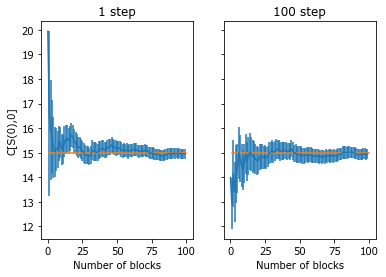

In [7]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

x1, y1, error1 = np.loadtxt("Ex_03.1/Call_1step.txt", usecols=(0,1,2), delimiter='\t', unpack='true')
x2, y2, error2 = np.loadtxt("Ex_03.1/Call_100step.txt", usecols=(0,1,2), delimiter='\t', unpack='true')


f, axarr = plt.subplots(1,2,sharey=True)

axarr[0].errorbar(x1,y1,yerr=error1)
axarr[0].set_title('1 step')
axarr[0].plot([1,50,100], [call, call, call])
axarr[0].set(xlabel='Number of blocks')
axarr[0].set(ylabel='C[S(0),0]')

axarr[1].errorbar(x2,y2,yerr=error2)
axarr[1].plot([1,50,100], [call, call, call])
axarr[1].set_title('100 step')
axarr[1].set(xlabel='Number of blocks')

plt.show()

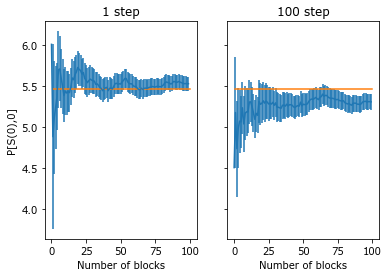

In [8]:
x1, y1, error1 = np.loadtxt("Ex_03.1/Put_1step.txt", usecols=(0,1,2), delimiter='\t', unpack='true')
x2, y2, error2 = np.loadtxt("Ex_03.1/Put_100step.txt", usecols=(0,1,2), delimiter='\t', unpack='true')


f, axarr = plt.subplots(1,2,sharey=True)

axarr[0].errorbar(x1,y1,yerr=error1)
axarr[0].set_title('1 step')
axarr[0].plot([1,50,100], [put, put, put])
axarr[0].set(xlabel='Number of blocks')
axarr[0].set(ylabel='P[S(0),0]')

axarr[1].errorbar(x2,y2,yerr=error2)
axarr[1].plot([1,50,100], [put, put, put])
axarr[1].set_title('100 step')
axarr[1].set(xlabel='Number of blocks')

plt.show()
